In [2]:
from google.colab import files

# Upload files
uploaded_files = files.upload()

# Display uploaded file names
for file_name in uploaded_files.keys():
    print(f'Uploaded file: {file_name}')



Saving Ola customer review.csv to Ola customer review.csv
Saving Uber dataset_2500.csv to Uber dataset_2500.csv
Uploaded file: Ola customer review.csv
Uploaded file: Uber dataset_2500.csv


In [ ]:
import pandas as pd

In [7]:
# df=pd.read_csv('/content/Ola customer review.csv')

ola = pd.read_csv('/content/Ola customer review.csv')
uber = pd.read_csv('/content/Uber dataset_2500.csv')

# Display the dataframes
ola.head()
uber.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,source,review_id,user_name,review_title,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,appVersion,laguage_code,country_code
0,Google Play,18d6584c-d0e9-4833-a744-f607058aee97,Milky Way,NaN,"Suddenly, the driver can't have my location an...",1,0,10-08-2023 17:48,NaN,NaN,NaN,en,in
1,Google Play,50a08f18-cece-4ddf-b617-028844c8aa28,Bradlee Severa,NaN,Very cordial.. And helped with a quick turnaro...,5,0,10-08-2023 17:38,NaN,NaN,4.485.10000,en,in
2,Google Play,b0d8e75a-80a7-4dcd-abaf-72b046dbeeb7,Amit Aggarwal,NaN,Very good experience,5,0,10-08-2023 17:38,NaN,NaN,4.486.10002,en,in
3,Google Play,502702a9-25ed-4373-a96c-7fa1f06caacd,Bryant Inman,NaN,All I use,5,0,10-08-2023 17:37,NaN,NaN,4.467.10008,en,in
4,Google Play,f47a3fb6-23db-49bd-9e63-f33c8d724d07,Addie Whittaker,NaN,I have enjoyed traveling by Uber my drivers ha...,5,0,10-08-2023 17:36,NaN,NaN,4.486.10002,en,in


In [8]:
columns_to_drop = ['review_id', 'user_name', 'review_title', 'appVersion', 'laguage_code', 'country_code']

ola.drop(columns=columns_to_drop, inplace=True)
uber.drop(columns=columns_to_drop, inplace=True)

In [11]:

def extract_time_features(df):
    # Convert 'review_date' to datetime with specified format and dayfirst=True
    df['review_date'] = pd.to_datetime(df['review_date'], format="%d-%m-%Y %H:%M", dayfirst=True, errors='coerce')

    # Extract time features
    df['day_of_week'] = df['review_date'].dt.day_name()
    df['month'] = df['review_date'].dt.month
    df['month_year'] = df['review_date'].dt.to_period('M')

    return df

# Apply the function to both datasets
uber = extract_time_features(uber)
ola = extract_time_features(ola)


In [12]:
ola['month_year'] = ola['review_date'].dt.strftime('%Y-%m')
uber['month_year'] = uber['review_date'].dt.strftime('%Y-%m')

In [13]:
ola.isnull().sum()

,0
source,0
review_description,1
rating,0
thumbs_up,0
review_date,0
developer_response,487
developer_response_date,487
day_of_week,0
month,0
month_year,0


In [14]:
uber.isnull().sum()

,0
source,0
review_description,0
rating,0
thumbs_up,0
review_date,0
developer_response,2491
developer_response_date,2491
day_of_week,0
month,0
month_year,0


In [15]:
print('Ola data preview')
ola.head()

Ola data preview


,source,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,day_of_week,month,month_year
0,Google Play,"The map in Ola is so messed up, i have to pay ...",1,0,2023-08-10 16:40:00,NaN,NaN,Thursday,8,2023-08
1,Google Play,Deepak Kumar.... 🙏🙏🙏🙏🙏],5,0,2023-08-10 16:36:00,NaN,NaN,Thursday,8,2023-08
2,Google Play,Such aa irresponsible app more then I waiting ...,1,0,2023-08-10 16:29:00,NaN,NaN,Thursday,8,2023-08
3,Google Play,Worst,1,0,2023-08-10 15:52:00,NaN,NaN,Thursday,8,2023-08
4,Google Play,Too much expensive .. try UBer... They are pro...,1,0,2023-08-10 15:51:00,NaN,NaN,Thursday,8,2023-08


In [16]:
print('Uber data preview')
uber.head()

Uber data preview


/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,source,review_description,rating,thumbs_up,review_date,developer_response,developer_response_date,day_of_week,month,month_year
0,Google Play,"Suddenly, the driver can't have my location an...",1,0,2023-10-08 17:48:00,NaN,NaN,Sunday,10,2023-10
1,Google Play,Very cordial.. And helped with a quick turnaro...,5,0,2023-10-08 17:38:00,NaN,NaN,Sunday,10,2023-10
2,Google Play,Very good experience,5,0,2023-10-08 17:38:00,NaN,NaN,Sunday,10,2023-10
3,Google Play,All I use,5,0,2023-10-08 17:37:00,NaN,NaN,Sunday,10,2023-10
4,Google Play,I have enjoyed traveling by Uber my drivers ha...,5,0,2023-10-08 17:36:00,NaN,NaN,Sunday,10,2023-10


In [17]:
print('Ola review sources')
ola['source'].value_counts()

Ola review sources


,count
source,
Google Play,2499


In [18]:
print('Uber review sources')
uber['source'].value_counts()

Uber review sources


,count
source,
Google Play,2499


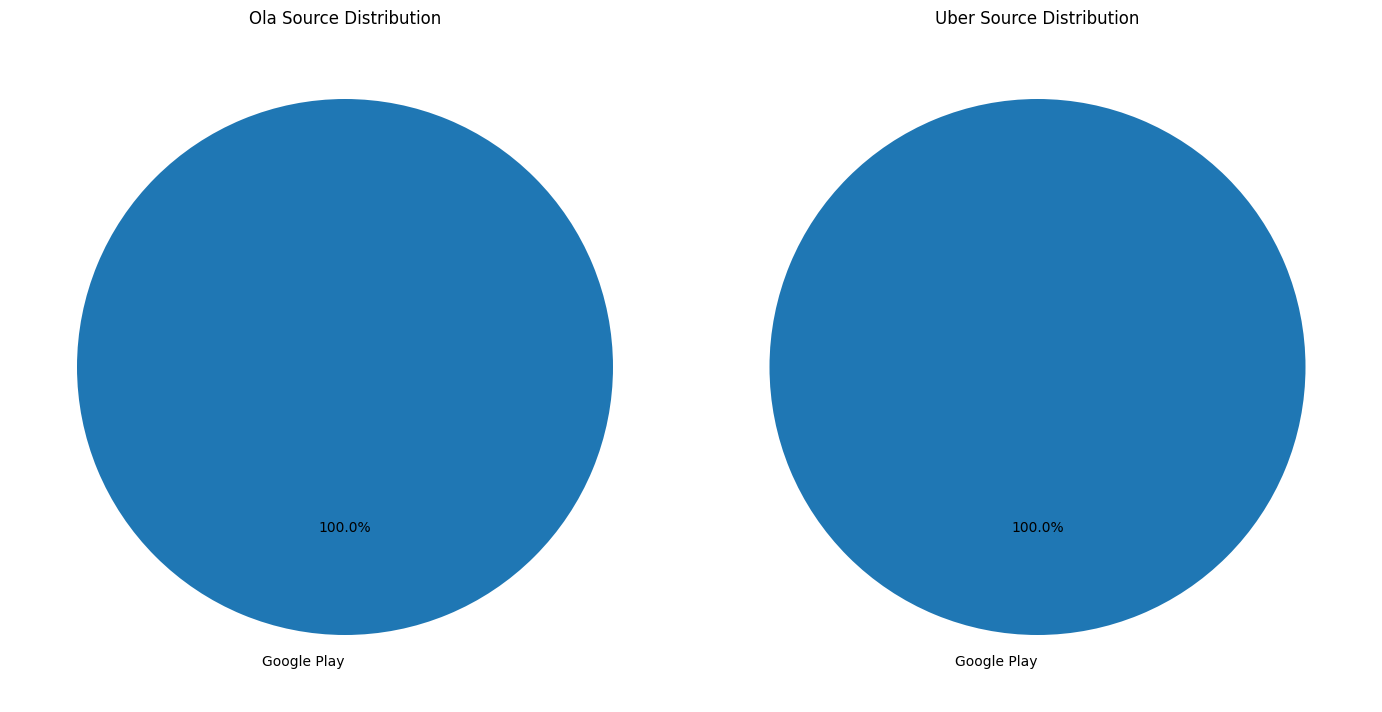

In [20]:
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))

# Ola pie chart
ola['source'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[0])
axes[0].set_title('Ola Source Distribution')
axes[0].set_ylabel('')  # This removes the 'source' ylabel for a cleaner look

# Uber pie chart
uber['source'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1])
axes[1].set_title('Uber Source Distribution')
axes[1].set_ylabel('')  # This removes the 'source' ylabel for a cleaner look

plt.tight_layout()
plt.show()


In [21]:
print('Ola review ratings description')
ola["rating"].agg(["min","mean","median","max","std","skew"]).to_frame().T

Ola review ratings description


,min,mean,median,max,std,skew
rating,1.0,1.716287,1.0,5.0,1.425751,1.693408


In [22]:
print('Uber review ratings description')
uber["rating"].agg(["min","mean","median","max","std","skew"]).to_frame().T

Uber review ratings description


,min,mean,median,max,std,skew
rating,1.0,4.003601,5.0,5.0,1.606503,-1.171215


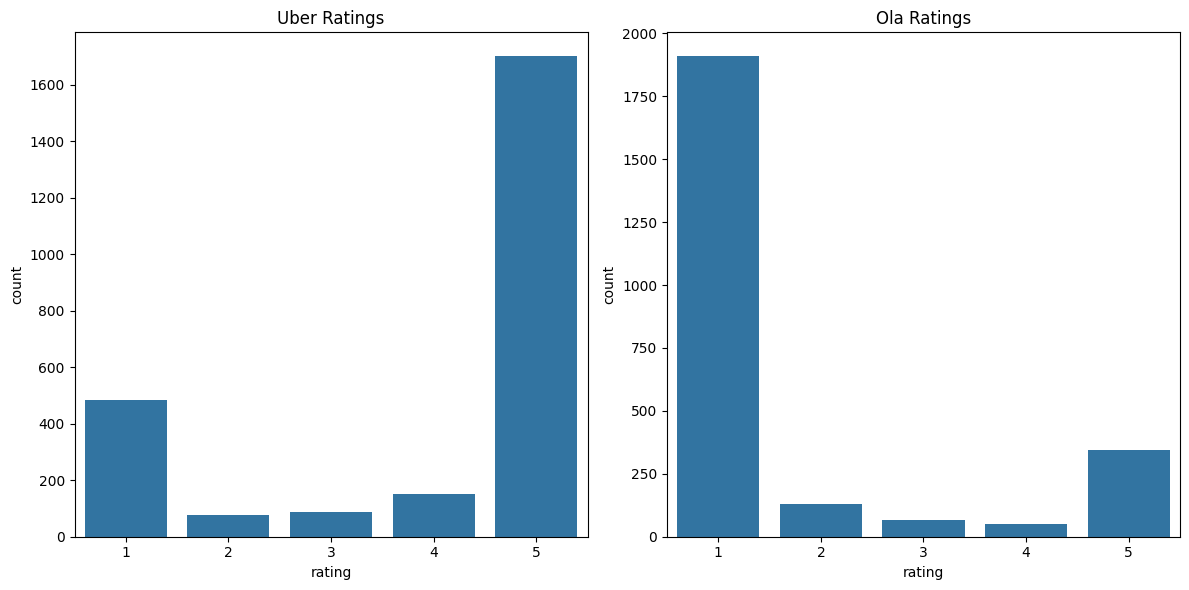

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.countplot(x=uber["rating"], ax=axes[0])
axes[0].set_title('Uber Ratings')

sns.countplot(x=ola["rating"], ax=axes[1])
axes[1].set_title('Ola Ratings')

plt.tight_layout()
plt.show()

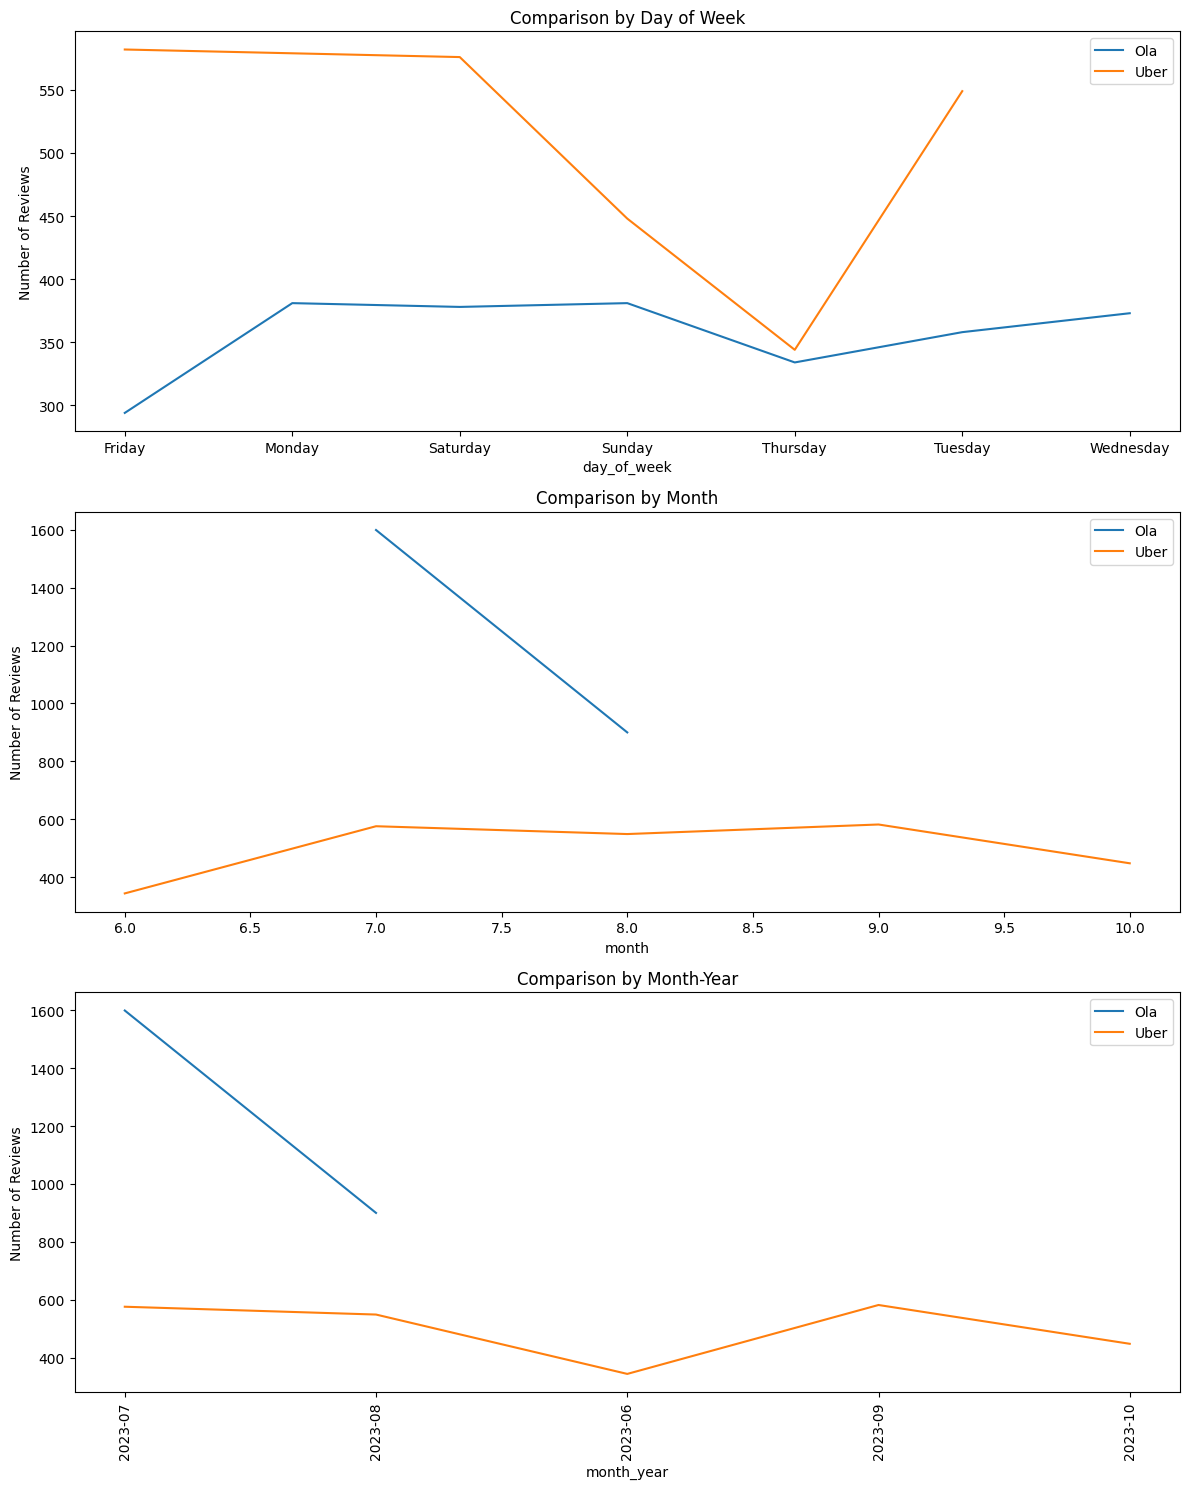

In [24]:
# Sort dataframes by 'month_year' for the plots
ola_sorted = ola.sort_values(by='month_year')
uber_sorted = uber.sort_values(by='month_year')

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(12, 15))

# Comparison by day_of_week
sns.lineplot(data=ola_sorted.groupby('day_of_week').size(), label='Ola', ax=axes[0])
sns.lineplot(data=uber_sorted.groupby('day_of_week').size(), label='Uber', ax=axes[0])
axes[0].set_title('Comparison by Day of Week')
axes[0].set_ylabel('Number of Reviews')
axes[0].legend()
# Comparison by month
sns.lineplot(data=ola_sorted.groupby('month').size(), label='Ola', ax=axes[1])
sns.lineplot(data=uber_sorted.groupby('month').size(), label='Uber', ax=axes[1])
axes[1].set_title('Comparison by Month')
axes[1].set_ylabel('Number of Reviews')
axes[1].legend()

# Comparison by month_year
sns.lineplot(data=ola_sorted.groupby('month_year').size(), label='Ola', ax=axes[2])
sns.lineplot(data=uber_sorted.groupby('month_year').size(), label='Uber', ax=axes[2])
axes[2].set_title('Comparison by Month-Year')
axes[2].set_ylabel('Number of Reviews')
axes[2].legend()
# Rotate x-axis labels
axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

In [25]:
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [26]:
# Convert the 'Text' column to string type to handle any float values
ola['review_description'] = ola['review_description'].astype(str)
uber['review_description'] = uber['review_description'].astype(str)

In [27]:
def classify_sentiment(text):
    # Check if the input is a string
    if isinstance(text, str):
        blob = TextBlob(text)
        polarity = blob.sentiment.polarity
        if polarity > 0.05:
            return 'positive'
        elif polarity < -0.05:
            return 'negative'
        else:
            return 'neutral'
    return None
    # Apply the function to the 'review_description' columns of both dataframes
ola['sentiment'] = ola['review_description'].apply(classify_sentiment)
uber['sentiment'] = uber['review_description'].apply(classify_sentiment)


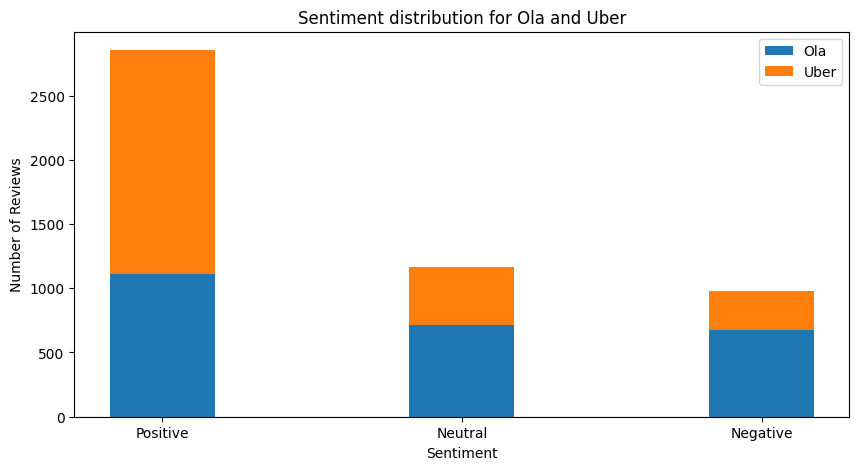

In [28]:
# Prepare data
ola_counts = ola['sentiment'].value_counts()
uber_counts = uber['sentiment'].value_counts()

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Set width of the bars
width = 0.35

# Set positions of the bars
ind = ola_counts.index
# Bar positions for Ola and Uber
p1 = ax.bar(ind, ola_counts, width)
p2 = ax.bar(ind, uber_counts, width, bottom=ola_counts)

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment distribution for Ola and Uber')
ax.set_xticks(ind)
ax.set_xticklabels(('Positive', 'Neutral', 'Negative'))
ax.legend((p1[0], p2[0]), ('Ola', 'Uber'))

plt.show()


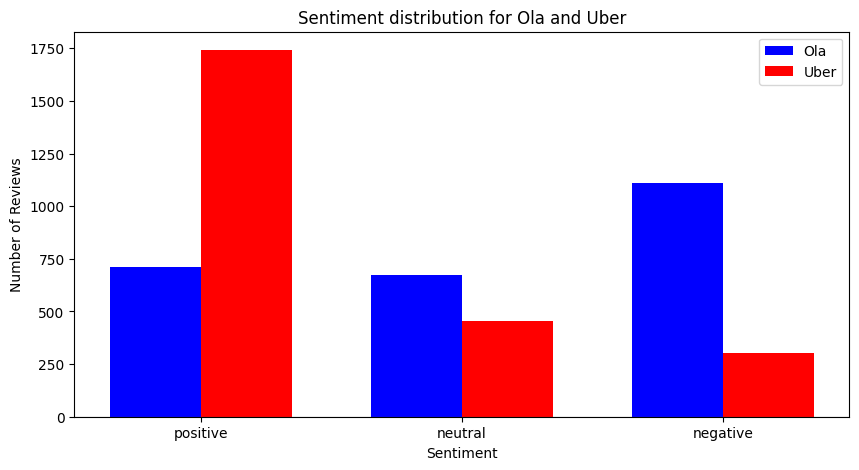

In [29]:
import numpy as np

# Ensure both series have the same indices (in case one lacks a sentiment)
all_sentiments = ['positive', 'neutral', 'negative']
ola_counts = ola_counts.reindex(all_sentiments, fill_value=0)
uber_counts = uber_counts.reindex(all_sentiments, fill_value=0)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))

# Set width of the bars
width = 0.35

# Bar positions
ind = np.arange(len(ola_counts))
ola_bars = ax.bar(ind - width/2, ola_counts, width, label='Ola', color='blue')
uber_bars = ax.bar(ind + width/2, uber_counts, width, label='Uber', color='red')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_xlabel('Sentiment')
ax.set_ylabel('Number of Reviews')
ax.set_title('Sentiment distribution for Ola and Uber')
ax.set_xticks(ind)
ax.set_xticklabels(all_sentiments)
ax.legend()

plt.show()